In [1]:
import torch
import os
model_list = os.listdir("../log/")

/home/qhy/anaconda3/envs/torch/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_list.sort()

In [8]:
dataset = "487-stage-1_3_4_3_1-ratio-1.0_1.0_0.25_0.125_0.25-op-vgg_repvgg_vgg_vgg_vgg-max-False_False_False_False_False-cifar100.yaml".split("-")[-1]
dataset

'cifar100.yaml'

100%|██████████| 649/649 [00:06<00:00, 99.35it/s] 


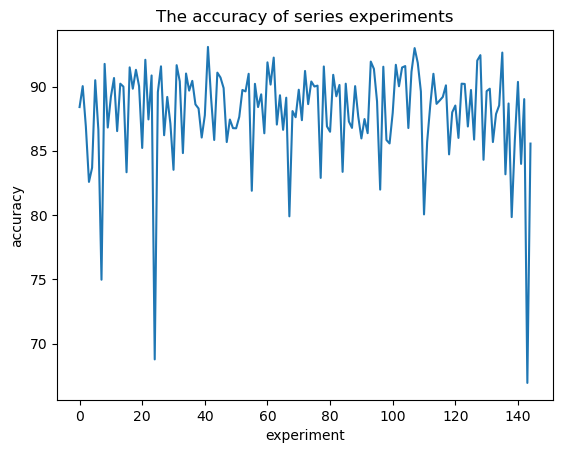

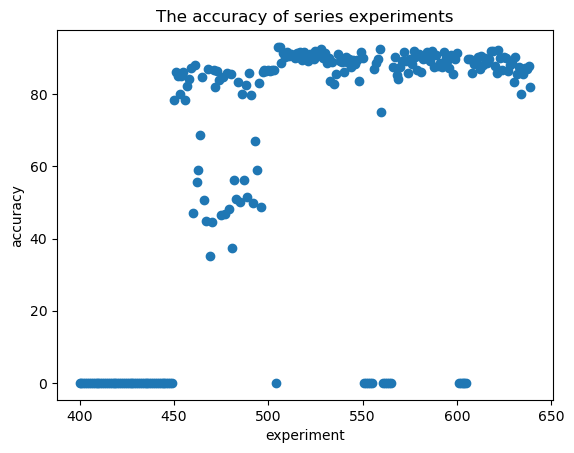

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch
import os
acc = np.zeros(640)
acc_cifar10 = []
acc_cifar100 = []
num_cifar10 = 0
num_cifar100 = 0

model_list = os.listdir("../config/")
for model_path in tqdm.tqdm(model_list):
    # print(model_path)
    path = os.path.join("/home/qhy/Reserach/AICAS/log",model_path.replace(".yaml",""),"best_ckpt.pth")
    if model_path not in ["repvgg.yaml","vgg.yaml","vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True.yaml",
                          "stage-1_3_4_1-ratio-1.0_0.375_0.75_0.125-op-vgg_vgg_repvgg_vgg-max-True_False_True_False.yaml",
                          "repvgg-A0-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False.yaml",
                          "benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml"]:
        num = int(model_path.split("-")[0])
        dataset = "cifar10"

        if os.path.exists(path) and num >= 450:
            # print(num)
            dataset = model_path.split("-")[-1].replace('.yaml','')
            if dataset == "cifar10":
                acc_cifar10.append(torch.load(path)['max_accuracy'])
                num_cifar10 += 1
            else :
                acc_cifar100.append(torch.load(path)['max_accuracy'])
                num_cifar100 += 1
            acc[num] = torch.load(path)['max_accuracy']
# plt.plot(range(352,400),acc[352:400])
plt.plot(range(num_cifar10),acc_cifar10)
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

# plt.plot(range(num_cifar100),acc_cifar100)
# plt.xlabel("experiment")
# plt.ylabel("accuracy")
# plt.title("The accuracy of series experiments")
# # plt.savefig("./pic/50-150.png")
# plt.show()

plt.scatter(range(400,640),acc[400:640])
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

In [3]:
max(acc[353:640])

93.08

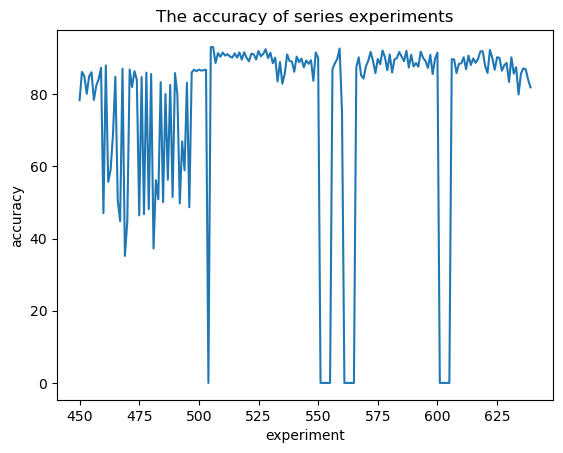

In [2]:
plt.plot(range(450,640),acc[450:640])
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

In [4]:
num = 450
for i in acc[450:640]:
    if(i>92):
        print(num,i)
    num+=1

505 93.08
506 92.99
528 92.44
559 92.64
577 92.08
587 92.02
622 92.25


In [5]:
model_path  = ["benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml"]
for p in model_path:
    path = os.path.join("/home/qhy/Reserach/AICAS/log",p.replace(".yaml",""),"best_ckpt.pth")
    print(p.split('-')[1],torch.load(path)['max_accuracy'])


vgg11 91.23
vgg13 93.24
vgg16 92.52
vgg19 92.93


In [15]:
from thop import profile 
import yaml
from easydict import EasyDict
import sys
sys.path.append("../")
from models import model as M
import numpy as np
total_num = 640
flops_list = np.zeros(total_num)
params_list = np.zeros(total_num)
model_list = os.listdir("../config/")
for model_path in tqdm.tqdm(model_list):
    if model_path not in ["repvgg.yaml","vgg.yaml","vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True.yaml",
                          "stage-1_3_4_1-ratio-1.0_0.375_0.75_0.125-op-vgg_vgg_repvgg_vgg-max-True_False_True_False.yaml",
                          "repvgg-A0-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False.yaml",
                          "benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-repvgg-a0-stage-1_2_4_14_1-ratio-0.75_0.75_0.75_0.75_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a1-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a2-stage-1_2_4_14_1-ratio-1.5_1.5_1.5_1.5_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b0-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b1-stage-1_2_4_14_1-ratio-2.0_2.0_2.0_2.0_4.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b2-stage-1_2_4_14_1-ratio-2.5_2.5_2.5_2.5_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b3-stage-1_2_4_14_1-ratio-3.0_3.0_3.0_3.0_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml"]:
        num = int(model_path.split("-")[0])
        path = os.path.join("/home/qhy/Reserach/AICAS/log",model_path)
        config = EasyDict(yaml.full_load(open(path)))
        model = M.Net(config, 10)
        input = torch.randn(1, 3, 32, 32)
        flops,params = profile(model, inputs=(input, ))
        flops_list[num] = flops/1e6
        params_list[num] = params/1e6
        # print('FLOPs = ' + str(flops/1000**2) + 'M')
        # print('Params = ' + str(params/1000**2) + 'M')

[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs = 19.089024M
Params = 0.87921M


In [9]:
# !pip3 install thop